# Investigating P. leidyi for mucus

Strategy:

- define core mucus gene set
- expand mucus gene set with STRING/CellPhoneDB/Coexpressed genes from Arches
- confirm on Human Cell Atlas
- search here

## Core mucus gene set

(in humans and mice) MUC2, MUC5AC, MUC5B, MUC6, and MUC19 are the secreted, gel-forming mucins.

### STRING/ARCHS - MUC2

- FAU
- FCGBP
- A2M
- CLEC10A
- CDX2
- GATA6
- CLCA1

### STRING/ARCHS - MUC5a

- TFF3
- ITGB4
- CD44
- CLEC10
- **AGR2**
- TFF1
- CEACAM
- ELF3

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np

In [ ]:
adata = sc.read_h5ad('/Users/npapadop/Documents/data/metazoan_atlases/pristina_leidyi/counts_and_metadata.h5ad')

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [ ]:
adata.raw = adata

In [ ]:
mucin_and_friends = ['MUC5','MUC2','FAU','FCGBP','A2M','CLEC10A','CDX2', 'SSPO'
                     'GATA6','CLCA1','TFF3','ITGB4','CD44','CLEC10','AGR2','TFF1','CEACAM','ELF3']

In [ ]:
keep = adata.var['name'].str.contains('spo', case=False)
adata.var[keep]

,gene_ids,feature_types,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,Description,Preferred_name,name,eggNOG_OGs,GOs,bilateria_og
plei_PrileiEVm003096t1,PrileiEVm003096t1,Gene Expression,133.0,False,122,0.001763,99.838241,133.0,True,0.124369,4.729063,0.144392,0.006803,0.171475,Serine-type endopeptidase inhibitor activity,SPON1,PrileiEVm003096t1 | SPON1,"KOG3539@1|root,KOG3539@2759|Eukaryota,38FW7@33...","GO:0000902,GO:0000904,GO:0005575,GO:0005576,GO...",3CYKJ@33213|Bilateria
plei_PrileiEVm004134t1,PrileiEVm004134t1,Gene Expression,90.0,False,84,0.001193,99.888625,90.0,True,0.097233,4.810450,0.456958,0.004800,0.146107,Spondin_N,SPON1,PrileiEVm004134t1 | SPON1,"KOG3539@1|root,KOG3539@2759|Eukaryota,38FW7@33...","GO:0000902,GO:0000904,GO:0005575,GO:0005576,GO...",3CYKJ@33213|Bilateria
plei_PrileiEVm008172t1,PrileiEVm008172t1,Gene Expression,124.0,False,104,0.001644,99.862107,124.0,True,0.140215,5.053003,1.388481,0.006191,0.168784,biological adhesion,SPON1,PrileiEVm008172t1 | SPON1,NaN,NaN,NaN
plei_PrileiEVm011903t1,PrileiEVm011903t1,Gene Expression,25.0,False,25,0.000331,99.966853,25.0,True,0.024779,4.627959,-0.243896,0.001378,0.076475,Speckle-type POZ protein,SPOPL,PrileiEVm011903t1 | SPOPL,NaN,NaN,NaN
plei_PrileiEVm012813t1,PrileiEVm012813t1,Gene Expression,171.0,False,162,0.002267,99.785206,171.0,True,0.161142,4.764402,0.280111,0.009043,0.197368,ubiquitin protein ligase binding,SPOPL,PrileiEVm012813t1 | SPOPL,"KOG1987@1|root,KOG1987@2759|Eukaryota,38DSA@33...","GO:0000122,GO:0000151,GO:0000209,GO:0001085,GO...",3CR5U@33213|Bilateria
plei_PrileiEVm012944t1,PrileiEVm012944t1,Gene Expression,1215.0,False,948,0.016110,98.743056,1215.0,True,0.899774,5.207628,0.819017,0.056596,0.510141,peptide cross-linking via chondroitin 4-sulfat...,SPOCK2,PrileiEVm012944t1 | SPOCK2,"KOG3555@1|root,KOG3555@2759|Eukaryota,39R6S@33...","GO:0003002,GO:0003674,GO:0004857,GO:0004866,GO...",3D1D1@33213|Bilateria
plei_PrileiEVm013416t1,PrileiEVm013416t1,Gene Expression,275.0,False,259,0.003646,99.656594,275.0,True,0.228621,4.648469,-0.165125,0.014022,0.243778,ubiquitin protein ligase binding,SPOPL,PrileiEVm013416t1 | SPOPL,"KOG1987@1|root,KOG1987@2759|Eukaryota,38DSA@33...","GO:0000122,GO:0000151,GO:0000209,GO:0001085,GO...",3CR5U@33213|Bilateria
plei_PrileiEVm013441t1,PrileiEVm013441t1,Gene Expression,66.0,False,62,0.000875,99.917795,66.0,True,0.079367,4.894541,0.779911,0.003668,0.128872,ubiquitin protein ligase binding,SPOPL,PrileiEVm013441t1 | SPOPL,"KOG1987@1|root,KOG1987@2759|Eukaryota,38DSA@33...","GO:0000122,GO:0000151,GO:0000209,GO:0001085,GO...",3CR5U@33213|Bilateria
plei_PrileiEVm014587t1,PrileiEVm014587t1,Gene Expression,511.0,False,455,0.006775,99.396720,511.0,True,0.486088,4.945501,0.743674,0.027005,0.350103,somatomedin-B and thrombospondin type-1 domain...,Sbspon,PrileiEVm014587t1 | Sbspon,"2C4A0@1|root,2QV8I@2759|Eukaryota,38BT9@33154|...",-,3E45Z@33213|Bilateria
plei_PrileiEVm014792t1,PrileiEVm014792t1,Gene Expression,83.0,False,70,0.001100,99.907188,83.0,True,0.100737,5.002803,1.195689,0.004207,0.140150,negative regulation of odontogenesis of dentin...,RSPO2,PrileiEVm014792t1 | RSPO2,"COG1404@1|root,KOG3525@2759|Eukaryota,39F6Z@33...","GO:0001501,GO:0001503,GO:0001649,GO:0001763,GO...",3CTQ4@33213|Bilateria


In [ ]:
keep = adata.var.index.str.contains('PrileiEVm003928t1')
adata.var[keep]

,gene_ids,feature_types,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,Description,Preferred_name,name,eggNOG_OGs,GOs,bilateria_og
plei_PrileiEVm003928t1,PrileiEVm003928t1,Gene Expression,532.0,False,483,0.007054,99.359595,532.0,True,0.483672,4.900986,0.559867,0.028142,0.355245,EGF domain,-,PrileiEVm003928t1 | -,NaN,NaN,NaN


In [ ]:
keep = adata.var.index.str.contains('PrileiEVm000142t1')
adata.var[keep]

,gene_ids,feature_types,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,Description,Preferred_name,name,eggNOG_OGs,GOs,bilateria_og
plei_PrileiEVm000142t1,PrileiEVm000142t1,Gene Expression,604.0,False,512,0.008008,99.321144,604.0,True,0.530684,4.969723,0.843689,0.030338,0.370353,Zonadhesin (gene pseudogene),ZAN,PrileiEVm000142t1 | ZAN,NaN,NaN,NaN


In [ ]:
invert_mucin_like = [
    "PrileiEVm000320t1",
    "PrileiEVm000649t1",
    "PrileiEVm000642t1",
    "PrileiEVm000119t1",
    "PrileiEVm000530t1",
    "PrileiEVm000054t1",
    "PrileiEVm003928t1",
    "PrileiEVm001421t1",
    "PrileiEVm000023t1",
    "PrileiEVm001541t1",
    "PrileiEVm000378t1",
    "PrileiEVm000210t1",
]

In [ ]:
candidates = []
for gene in invert_mucin_like:
    if any(adata.var['name'].str.contains(gene)):
        keep = adata.var['name'].str.contains(gene)
        genes = adata.var['name'][keep]
        candidates += list(genes.values)
real_candidates = list(set(candidates))

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 

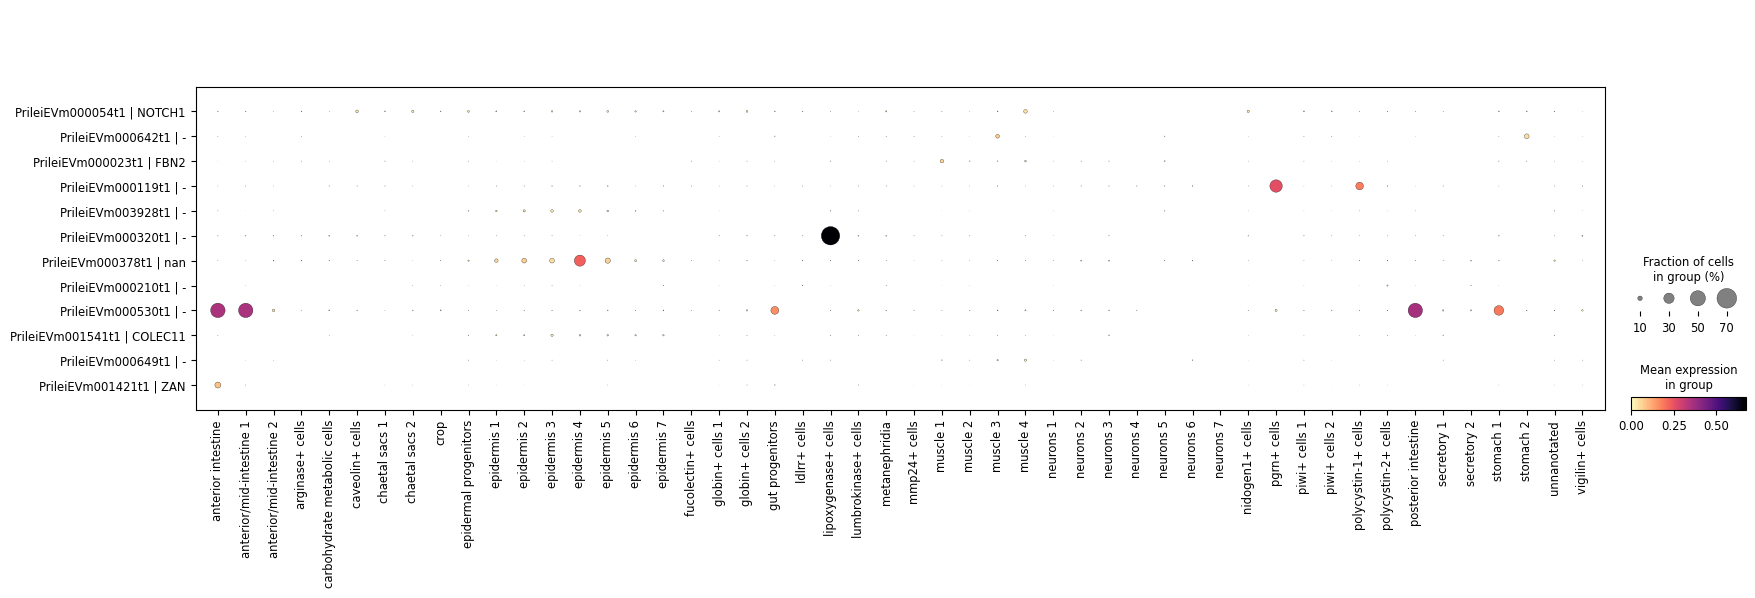

In [ ]:
sc.pl.dotplot(adata, real_candidates,
              groupby='leiden_1.5_names',
              gene_symbols='name', cmap='magma_r',
              swap_axes=True)

In [ ]:
keep = adata.var['Description'].astype(str).str.contains('muc', case=False)
manual = ['PrileiEVm003928t1 | -',
          'PrileiEVm000004t1 | -',
          'PrileiEVm000142t1 | ZAN']

mucins = list(adata.var[keep]['name'].values) + manual

In [ ]:
candidates = []
for gene in mucin_and_friends:
    if any(adata.var['name'].str.contains(gene)):
        keep = adata.var['name'].str.contains(gene)
        genes = adata.var['name'][keep]
        candidates += list(genes.values)
real_candidates = list(set(candidates))

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 

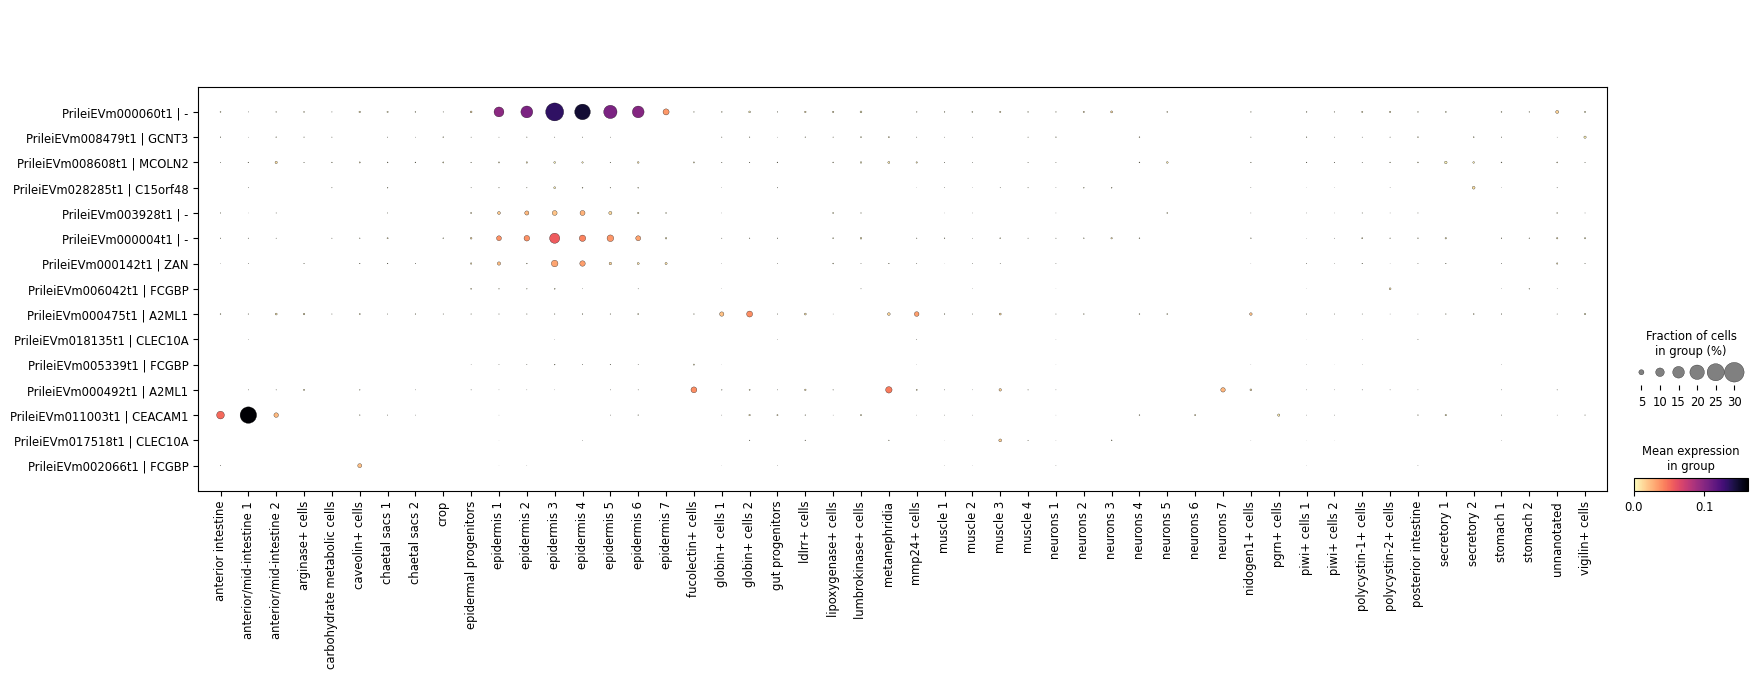

In [ ]:
sc.pl.dotplot(adata, mucins+real_candidates,
              groupby='leiden_1.5_names',
              gene_symbols='name', cmap='magma_r',
              swap_axes=True)

In [ ]:
adata.obs['mucus_test'] = adata.obs['broad_names']
adata.obs['mucus_test'].replace(to_replace='epidermis', value='mucus', inplace=True)
adata.obs['mucus_test'].replace(to_replace='gut', value='mucus', inplace=True)

broad_names
piwi+ cells                     16247
epidermis                       14917
gut                              9253
muscle                           9141
neurons                          6105
globin+ cells                    4976
polycystin cells                 4120
eleocytes                        3099
chaetal sacs                     1828
lipoxygenase+ cells              1191
unnanotated                      1048
vigilin+ cells                    809
lumbrokinase+ cells               603
carbohydrate metabolic cells      483
secretory                         481
arginase+ cells                   351
ldlrr+ cells                      286
metanephridia                     280
Name: count, dtype: int64

In [ ]:
gene_ids = pd.DataFrame(adata.uns['rank_genes_groups_wilcox_broad_names']['names'])['eleocytes'][:300]
proper = 'plei_' + gene_ids
proper = np.intersect1d(proper, adata.var.index)
gene_names = adata.var.loc[proper]['name'].values

real_names = [g for g in gene_names if ' -' not in g and ' nan' not in g]

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 

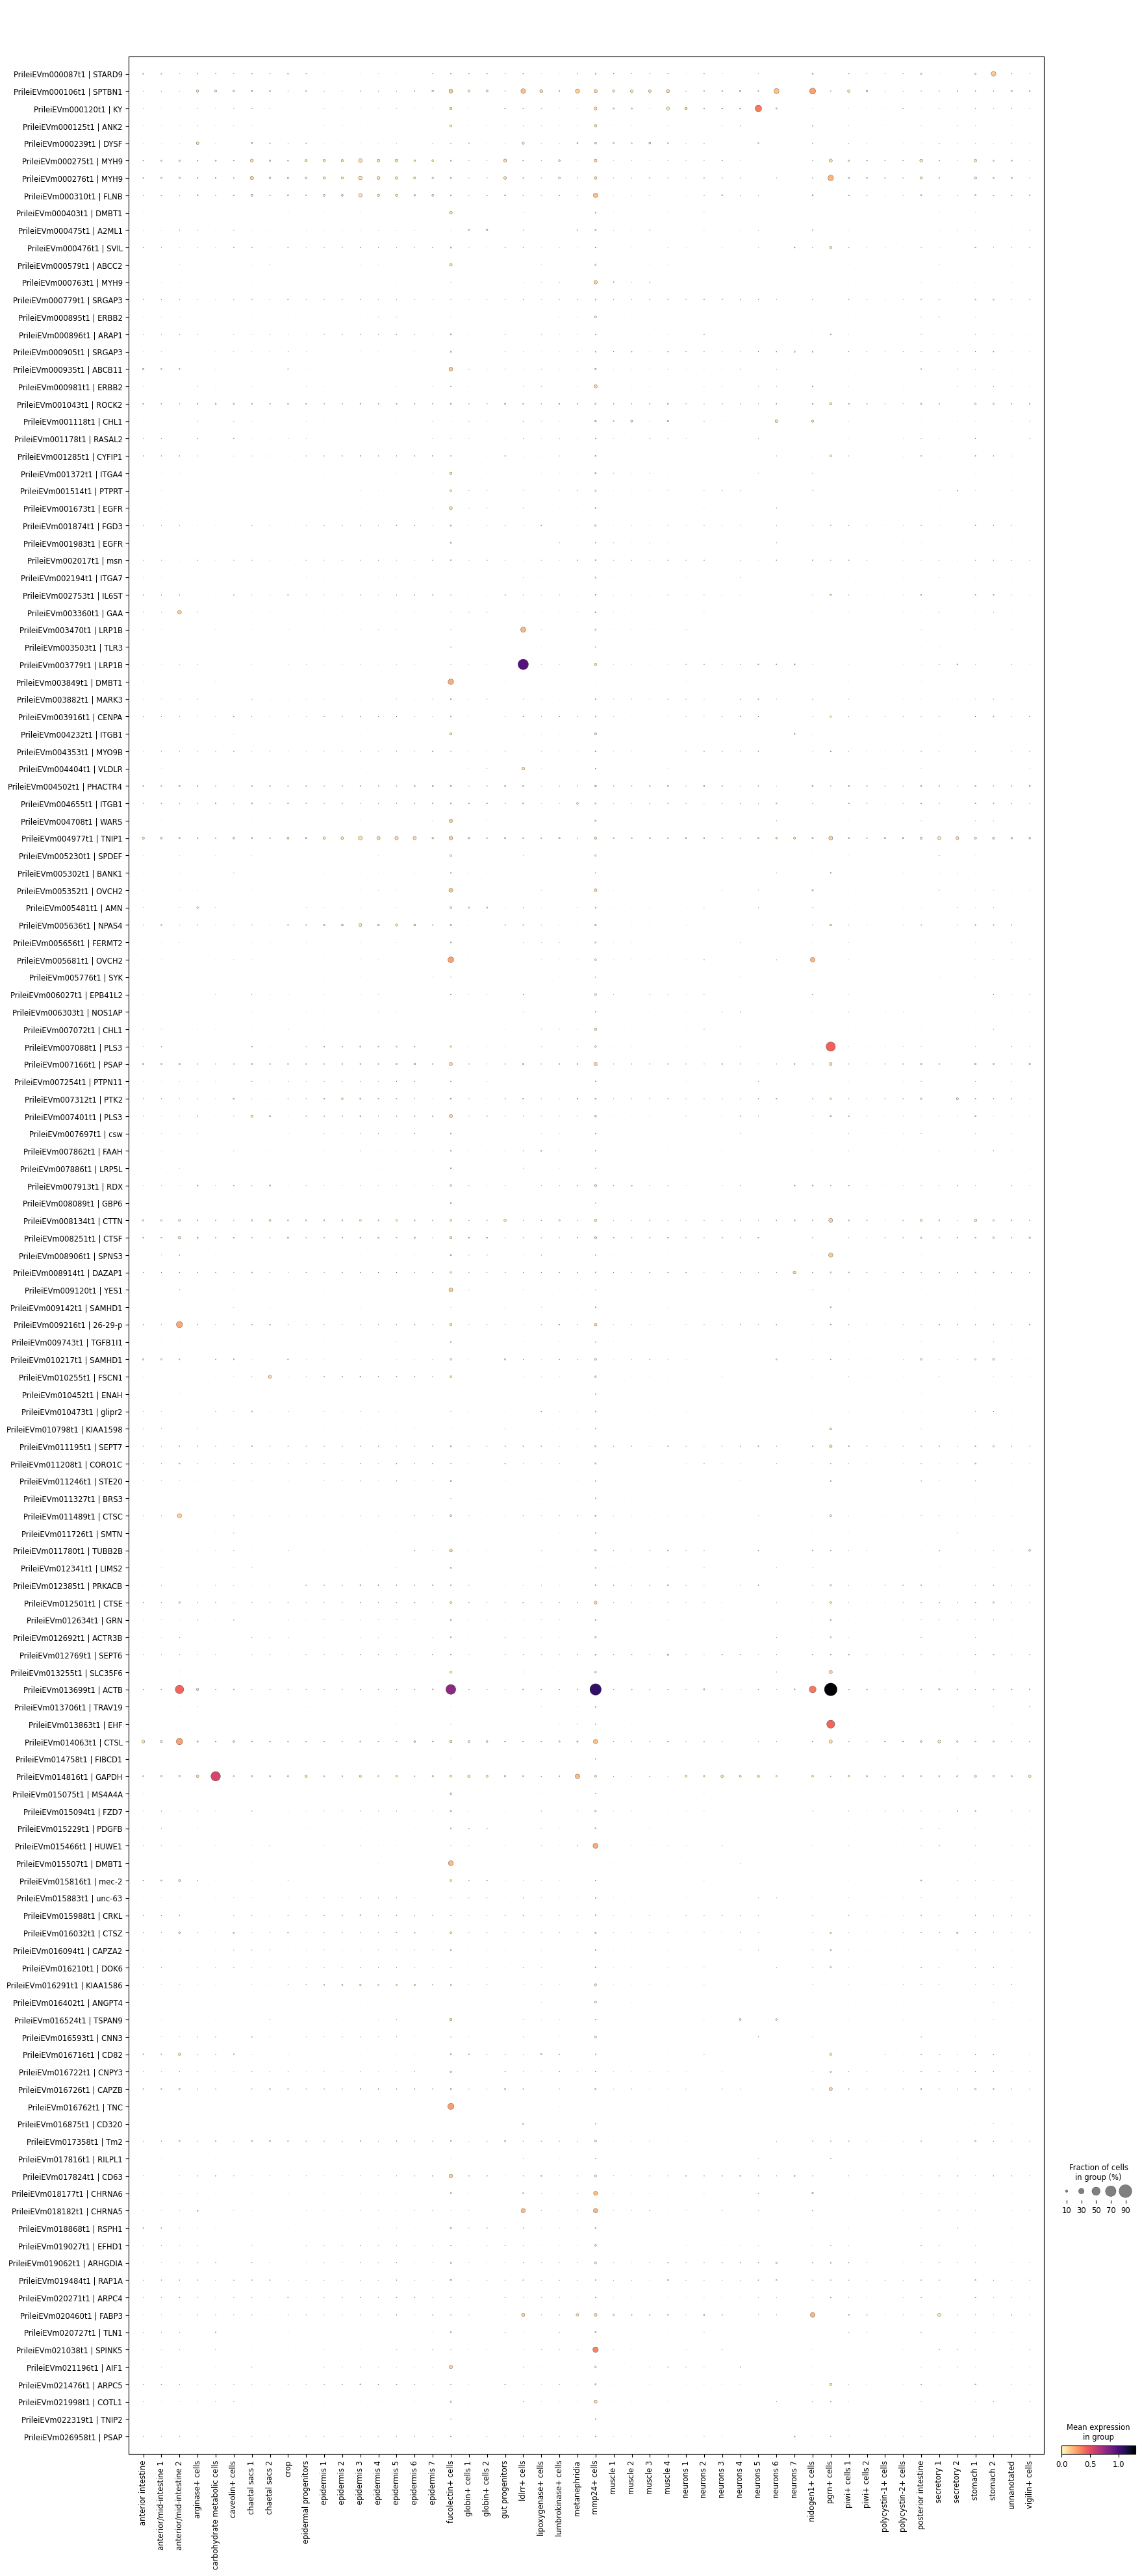

In [ ]:
sc.pl.dotplot(adata, real_names,
              groupby='leiden_1.5_names',
              gene_symbols='name', cmap='magma_r',
              swap_axes=True)

In [ ]:
gene_ids = [
    "plei_PrileiEVm008287t1", # laminin, probably, says emapper
    "plei_PrileiEVm008309t1", # laminin, probably, says emapper
    "plei_PrileiEVm017189t1", # unknown
    "plei_PrileiEVm015394t1", # unknown
    "plei_PrileiEVm004988t1", # ???
    "plei_PrileiEVm002081t1", # zinc finger??
    "plei_PrileiEVm000937t1", # zinc finger??
]
gene_names = adata.var.loc[gene_ids]['name'].values

In [ ]:
adata.var.loc[gene_ids]

,gene_ids,feature_types,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,Description,Preferred_name,name,eggNOG_OGs,GOs,bilateria_og
plei_PrileiEVm008287t1,PrileiEVm008287t1,Gene Expression,17243.0,False,9159,0.228623,87.856167,17243.0,True,3.020319,5.431280,0.802530,0.589567,1.604197,Belongs to the intermediate filament family,-,PrileiEVm008287t1 | -,"KOG0977@1|root,KOG0977@2759|Eukaryota,38FB1@33...",-,3CTT5@33213|Bilateria
plei_PrileiEVm008309t1,PrileiEVm008309t1,Gene Expression,13514.0,False,7346,0.179181,90.260007,13514.0,True,2.792391,5.432380,0.804931,0.470888,1.449719,Belongs to the intermediate filament family,-,PrileiEVm008309t1 | -,"KOG0977@1|root,KOG0977@2759|Eukaryota,38FB1@33...",-,3CTT5@33213|Bilateria
plei_PrileiEVm017189t1,PrileiEVm017189t1,Gene Expression,6183.0,False,4484,0.081980,94.054706,6183.0,True,2.104122,5.073562,0.371551,0.274918,1.105039,NaN,NaN,PrileiEVm017189t1 | nan,NaN,NaN,NaN
plei_PrileiEVm015394t1,PrileiEVm015394t1,Gene Expression,1109.0,False,996,0.014704,98.679413,1109.0,True,0.824156,4.852264,0.149636,0.058048,0.508342,NaN,NaN,PrileiEVm015394t1 | nan,NaN,NaN,NaN
plei_PrileiEVm004988t1,PrileiEVm004988t1,Gene Expression,3678.0,False,3000,0.048766,96.022328,3678.0,True,1.664826,4.970650,0.118386,0.178987,0.889850,pancreatic polypeptide receptor activity,PROKR2,PrileiEVm004988t1 | PROKR2,NaN,NaN,NaN
plei_PrileiEVm002081t1,PrileiEVm002081t1,Gene Expression,1715.0,False,1554,0.022739,97.939566,1715.0,True,1.067125,4.800595,-0.159915,0.089505,0.625659,-,-,PrileiEVm002081t1 | -,"2CN0N@1|root,2QT5H@2759|Eukaryota,38HD6@33154|...",-,NaN
plei_PrileiEVm000937t1,PrileiEVm000937t1,Gene Expression,1468.0,False,1341,0.019464,98.221981,1468.0,True,0.953377,4.765455,-0.244430,0.076815,0.578416,-,-,PrileiEVm000937t1 | -,"2CN0N@1|root,2QT5H@2759|Eukaryota,38HD6@33154|...",-,3D1YD@33213|Bilateria


/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 

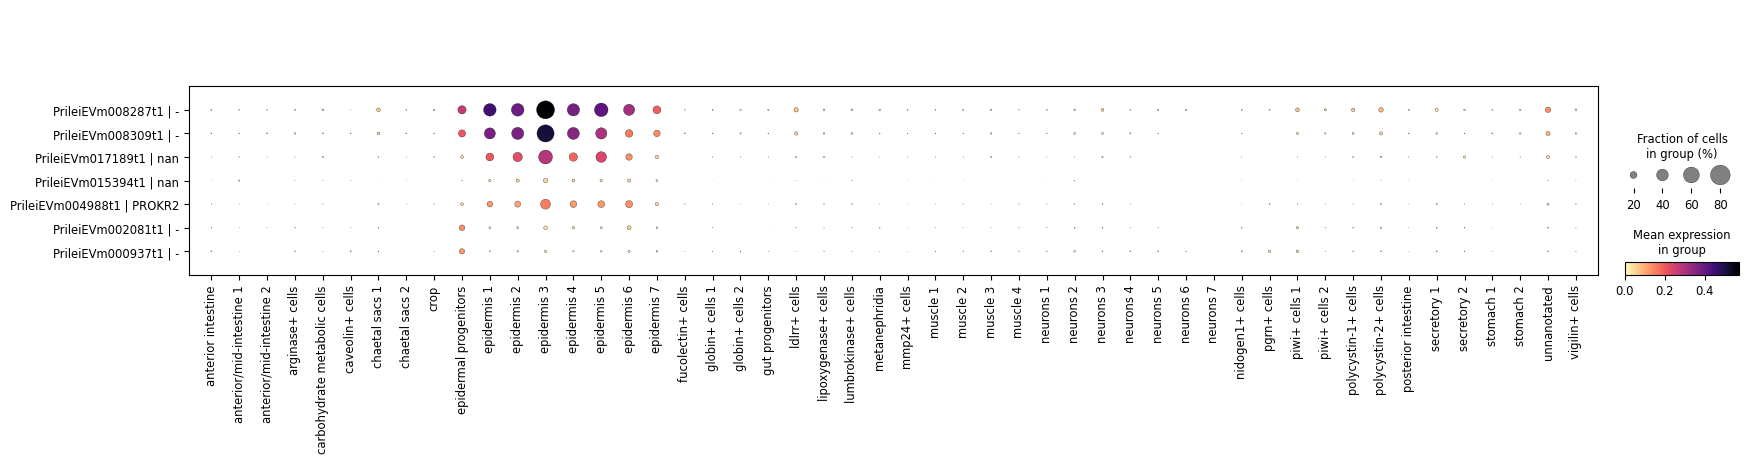

In [ ]:
sc.pl.dotplot(adata, gene_names,
              groupby='leiden_1.5_names',
              gene_symbols='name', cmap='magma_r',
              swap_axes=True)